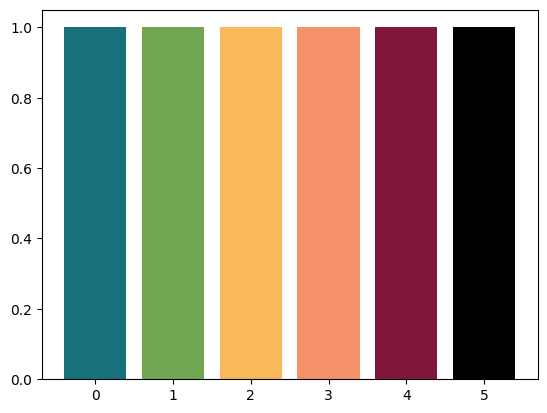

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

bohr_magneton = 93.4376

cls = ['#17707B','#70A551','#F9B859','#F6926A','#80173A', '#000000']
plt.bar(range(len(cls)), [1]*len(cls), color=cls)
plt.show()

In [ ]:
filename = 'ConstraintFiles/t2k.txt'
xs = []
ys = []
with open(filename,'r') as f:
    for line in f.readlines():
        x, y = line.strip().split(', ')
        xs.append(float(x))
        ys.append(float(y))
    
with open(filename, 'w') as f:
    for x, y in zip(xs, ys):
        f.write(f"{x:.32f}\t{y:.32f}\n")

In [8]:
import numpy as np
filename = 'ConstraintFiles/t2k_notfull_.txt'
output = 'ConstraintFiles/AFH_T2K_FULL.txt'
xs = []
ys = []
with open(filename,'r') as f:
    for line in f.readlines():
        x, y = line.strip().split(', ')
        xs.append(np.log10(float(x)))
        ys.append(float(y))
    
with open(output, 'w') as f:
    for x, y in zip(xs, ys):
        f.write(f"{x:.32f}\t{y:.32f}\n")

In [2]:
def load_constraint(filelist):
    mlist, u2list = np.empty(0),np.empty(0)
    for file in filelist:
        md = np.loadtxt('ConstraintFiles/'+file)
        m,u2 = md[:,0],md[:,1]
        mlist = np.append(mlist,10**m)
        u2list = np.append(u2list,10**u2)
    return mlist,u2list

In [4]:
constraints,labels,label_position,label_angle,params,colors = {},{},{},{},{},{}
recreate = {}
# PS191
constraints['PS191'] = load_constraint(['PS191.txt'])
labels['PS191'] = 'PS191'
label_position['PS191'] = (215,5e-11)
label_angle['PS191'] = 68
params['PS191'] = 'MU2'
colors['PS191'] = cls[4]
recreate['PS191'] = False

# Matheus' T2K 2019
constraints['AFH_2019'] = load_constraint(['AFH_T2K_2019.txt'])
labels['AFH_2019'] = 'T2K (AFH 2019)' 
label_position['AFH_2019'] = (2.25,-9)
label_angle['AFH_2019'] = 68
params['AFH_2019'] = 'MU2'
colors['AFH_2019'] = cls[0]
recreate['AFH_2019'] = False

# Matheus' T2K full
constraints['AFH_full'] = load_constraint(['AFH_T2K_FULL.txt'])
labels['AFH_full'] = 'T2K + T2KII (AFH 2019)'
label_position['AFH_full'] = (1.6,-9)
label_angle['AFH_full'] = -31
params['AFH_full'] = 'MU2'
colors['AFH_full'] = cls[2]
recreate['AFH_full'] = False

# T2K 2019 method a
constraints['recreate_2019_a'] = load_constraint(['recreate_SIREN.txt'])
labels['recreate_2019_a'] = 'T2K (SIREN)'
label_position['recreate_2019_a'] = (1.6,-9)
label_angle['recreate_2019_a'] = -31
params['recreate_2019_a'] = 'MU2'
colors['recreate_2019_a'] = cls[0]
recreate['recreate_2019_a'] = True

# T2K full method a 
constraints['recreate_full_a'] = load_constraint(['recreate_SIREN_FULL.txt'])
labels['recreate_full_a'] = 'T2K + T2KII (SIREN)'
label_position['recreate_full_a'] = (1.6,-11.5)
label_angle['recreate_full_a'] = -35
params['recreate_full_a'] = 'MU2'
colors['recreate_full_a'] = cls[2]
recreate['recreate_full_a'] = True

# T2K 2019 method b
constraints['recreate_2019_b'] = load_constraint(['recreate_AFH.txt'])
labels['recreate_2019_b'] = 'T2K (exp scaling)'
label_position['recreate_2019_b'] = (1.6,-9)
label_angle['recreate_2019_b'] = -31
params['recreate_2019_b'] = 'MU2'
colors['recreate_2019_b'] = cls[0]
recreate['recreate_2019_b'] = True

# T2K full method b 
constraints['recreate_full_b'] = load_constraint(['recreate_AFH_FULL.txt'])
labels['recreate_full_b'] = 'T2K + T2KII (exp scaling)'
label_position['recreate_full_b'] = (1.6,-11.5)
label_angle['recreate_full_b'] = -35
params['recreate_full_b'] = 'MU2'
colors['recreate_full_b'] = cls[2]
recreate['recreate_full_b'] = True

# MicroBooNE 
constraints['microboone'] = load_constraint(['microboone.txt'])
labels['microboone'] = 'MicroBooNE'
label_position['microboone'] = (120,1e-8)
label_angle['microboone'] = 80
params['microboone'] = 'MU2'
colors['microboone'] = cls[5]
recreate['microboone'] = False

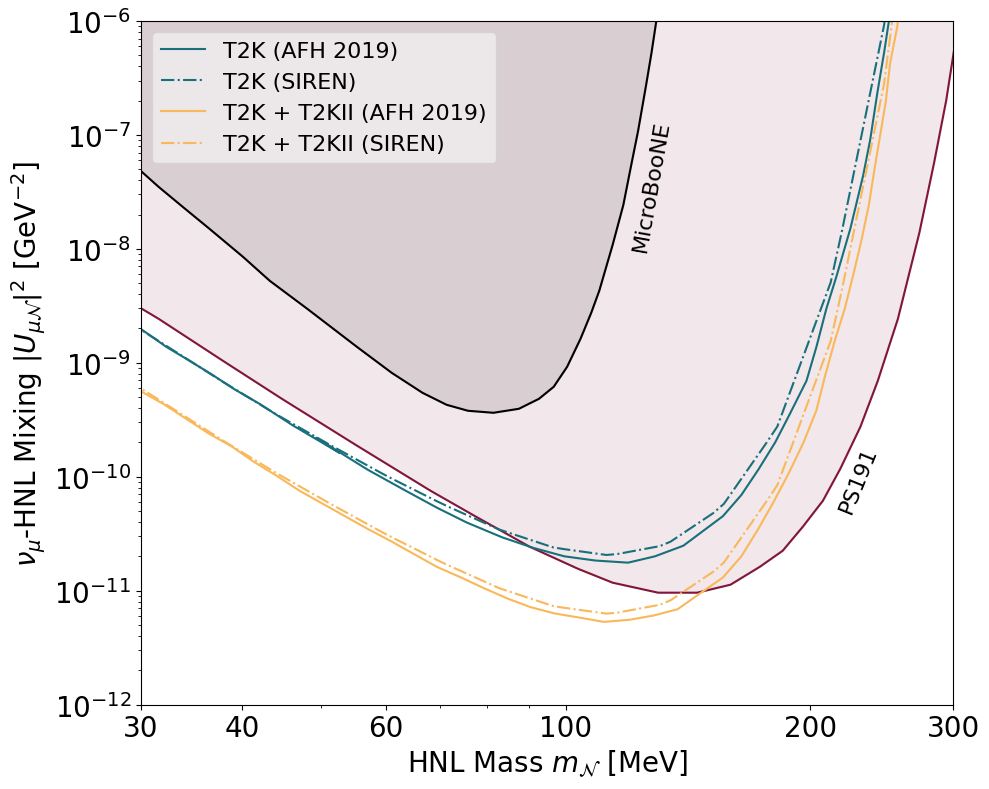

In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from labellines import labelLine, labelLines
# skip = ['T2K_T2KII']
# skip = ['T2K_2019']
skip =['recreate_2019_b','recreate_full_b']
legend_keys = ['AFH_2019','recreate_2019_a','recreate_2019_b','AFH_full','recreate_full_a','recreate_full_b']
show_label = False
show_recreate = True
fig = plt.figure(figsize=(10,8))
legend_handles = {} # Dictionary to store plot handles for legend
for exp_key, (con_m, con_U) in constraints.items():

    if exp_key in skip:
        continue
    elif recreate[exp_key]:
        if show_recreate:
            line, = plt.plot(con_m, con_U, alpha=1, linestyle='dashed' if 'b' in exp_key else 'dashdot', color=colors[exp_key])
            legend_handles[exp_key] = line
        else:
            continue
    elif exp_key == 'PS191':
        fill = plt.fill_between(con_m, con_U, 1e-5, alpha=0.1, color=colors[exp_key])
        line, = plt.plot(con_m, con_U, alpha=1, linestyle='solid', color=colors[exp_key])
        legend_handles[exp_key] = line
    elif exp_key == 'AFH_2019' or exp_key == 'AFH_full':
        line, = plt.plot(con_m, con_U, alpha=1, linestyle='solid', color=colors[exp_key])
        legend_handles[exp_key] = line
    else:
        color = colors.get(exp_key, 'black')
        fill = plt.fill_between(con_m, con_U, 1e-5, alpha=0.1, color=color)
        line, = plt.plot(con_m, con_U, alpha=1, linestyle='solid', color=colors[exp_key])
        legend_handles[exp_key] = Patch(facecolor=color, edgecolor=color, alpha=0.1)
        
    if exp_key not in legend_keys:
        plt.text(*label_position[exp_key], labels[exp_key], rotation=label_angle[exp_key], color='black', fontsize=16)

# Add legend
legend_items = [legend_handles[key] for key in legend_keys if key in legend_handles]
legend_labels = [labels[key] for key in legend_keys if key in legend_handles]
plt.legend(handles=legend_items,
          labels=legend_labels,
          loc='upper left',
          fontsize=16,
          ncol=1,
          framealpha=0.5)

# Set custom x-axis ticks
custom_ticks = [30, 40, 60, 100, 200, 300]
plt.xlim(30,300)
plt.xscale('log')
plt.xticks(custom_ticks, [str(x) for x in custom_ticks], fontsize=20)

plt.ylim(1e-12,1e-6)
plt.yscale('log')

plt.xlabel(r'HNL Mass $m_\mathcal{N}$ [MeV]', fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel(r'$\nu_\mu$-HNL Mixing $|U_{\mu\mathcal{N}}|^2$ [GeV$^{-2}$]', fontsize=20)
plt.tight_layout()
plt.savefig('recreate.pdf', dpi=200)
plt.show()